# Propagation of Hollow Core waveguide at resonant wavelength

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from slab import SlabExact, plotlogf, plotlogf_real
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

# Setup Waveguide and input fields

In [2]:
loss_min_wl = 5.828070175438596e-06
max_loss_wl = 6.90764472e-06

In [3]:
A = SlabExact(scale=1e-5, Ts=[6.5, 1, 8, 1, 6.5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=max_loss_wl)

In [4]:
b = 1.25
a = 1/ b**2
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - a * x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [5]:
# Set input function
f0 = quadratic_piecewise

# Set input field type
field_type = 'TE'

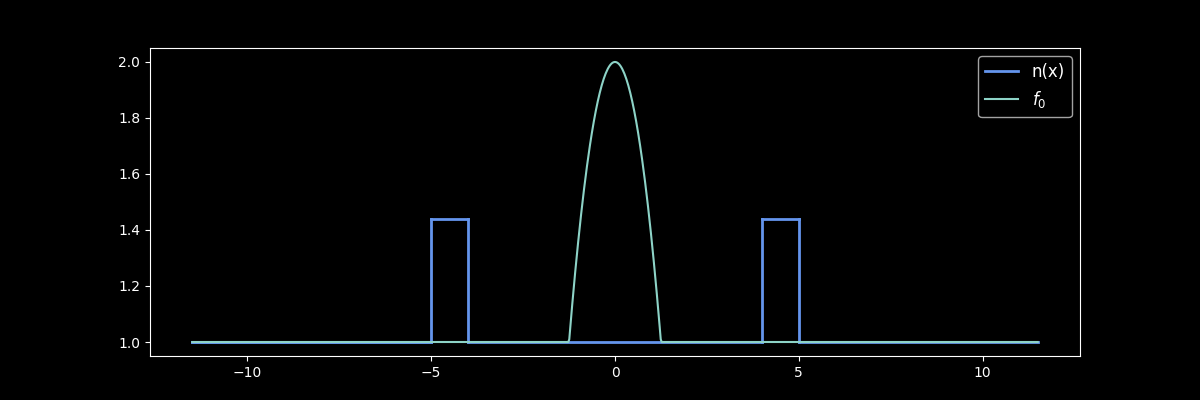

In [6]:
A.plot_refractive_index(color='cornflowerblue', linewidth=2);
A.add_1d_plot(lambda x: f0(x) + 1, label='$f_0$')

# Guided Portion

Based on info below, we found the actual guided mode near K_low

In [400]:
mode_type = 'guided'
k_low = A.K_low

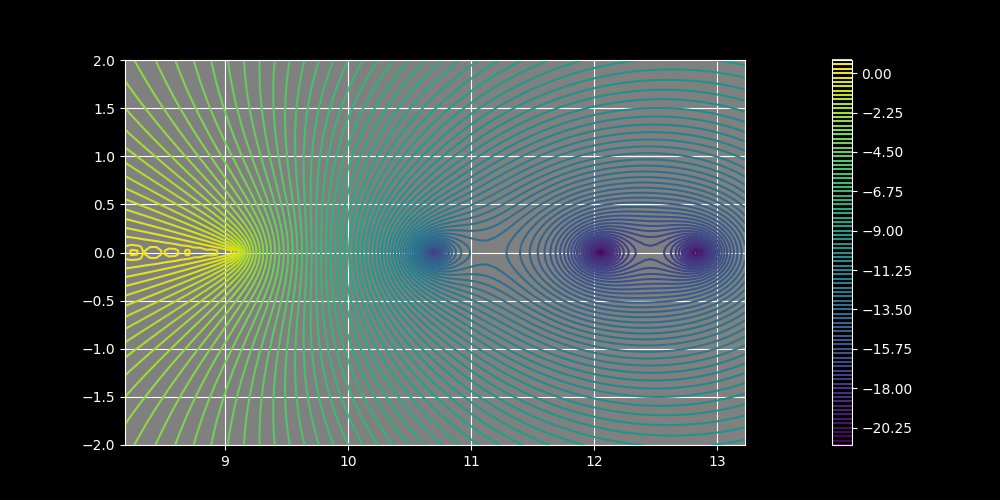

In [401]:
plotlogf(A.determinant, .9*A.K_low, 1.01*A.K_high, -2, 2, field_type, mode_type, figsize=(10,5),iref=100, rref=100,levels=100)

In [402]:
beta1 = newton(A.determinant, 10.6, args=('TE', mode_type))
print(abs(A.determinant(beta1, 'TE', mode_type)))
plt.plot(beta1.real, beta1.imag, marker='o')
beta1

2.854600874522125e-20


(10.694670923753925+7.56749184034015e-17j)

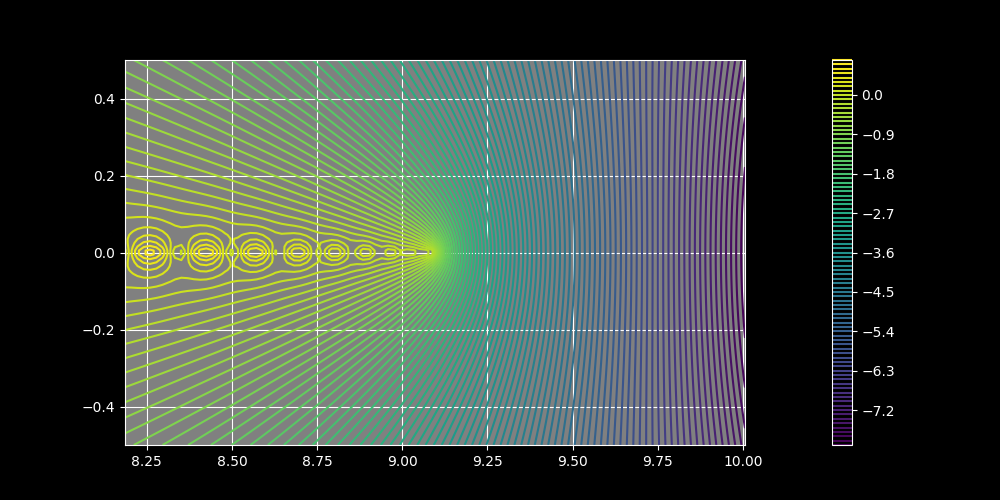

In [403]:
plotlogf(A.determinant, .9*A.K_low, 1.1*A.K_low, -.5, .5, field_type, mode_type, figsize=(10,5), iref=100, rref=100,levels=100)

In [404]:
Fs1 = A.fields(beta1, field_type='TE', mode_type=mode_type)


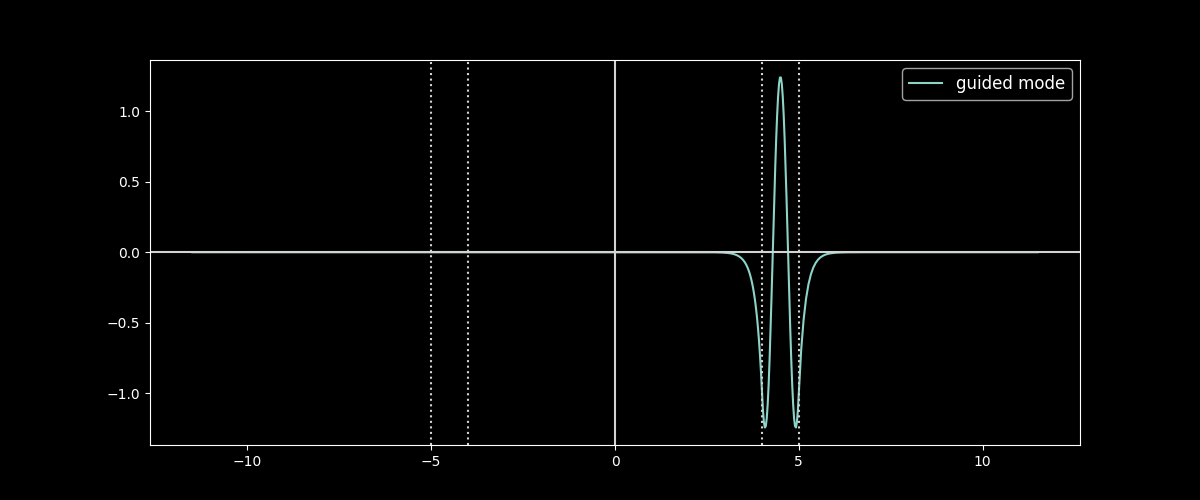

In [405]:
A.plot_field_1d(Fs1, label='guided mode');


## Get coefficient of guided mode


In [406]:
from scipy.integrate import quad
integrand = lambda x: Fs1(x) * Fs1(x)
cf1 = quad(integrand, -20,20, complex_func=True)[0].real
cf1

1.0486801443071538

In [407]:
integrand = lambda x: f0(x) * Fs1(x)
cf2 = quad(integrand, -.5, .5, complex_func=True)[0].real
cf2

-4.5566352010094165e-10

In [408]:
alpha = cf2/cf1
alpha

-4.3451144047548574e-10

When exactly at resonant input frequencies, the guided mode with significant core overlap has already been cutoff and hence plays no role.  It is at near resonant frequencies we can expect to see it come into play.

# Propagate Radiation Field

In [409]:
Propagator_Class = A.propagator()


### Propagating Portion

This part takes a lot of resolution in this case

#### Spike 1

In [410]:
# P_prop1 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=0.005, RZ=.385, NZ=100)
P_prop1 = Propagator_Class(A.real_contour(.000001, .385, 200), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

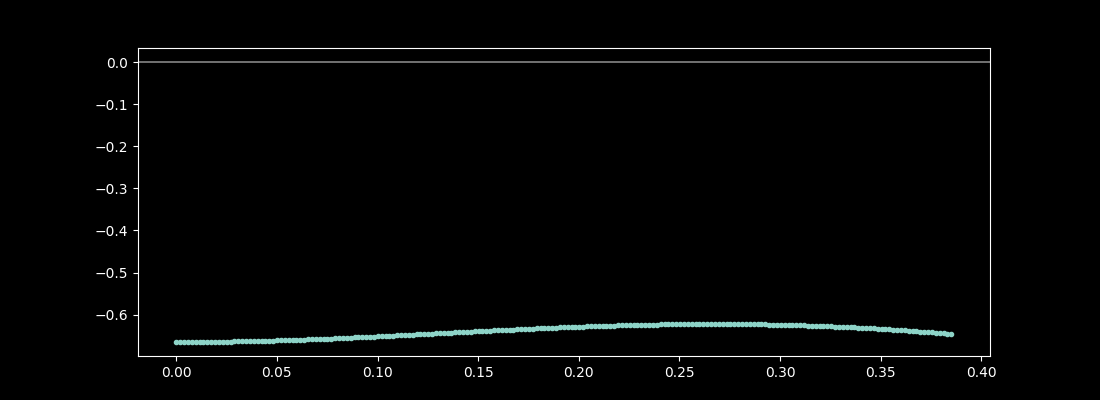

In [411]:
P_prop1.plot_transform()

In [412]:
# P_prop1_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=0.385, RZ=.42, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop1_5 = Propagator_Class(A.real_contour(.385, .42, 200), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

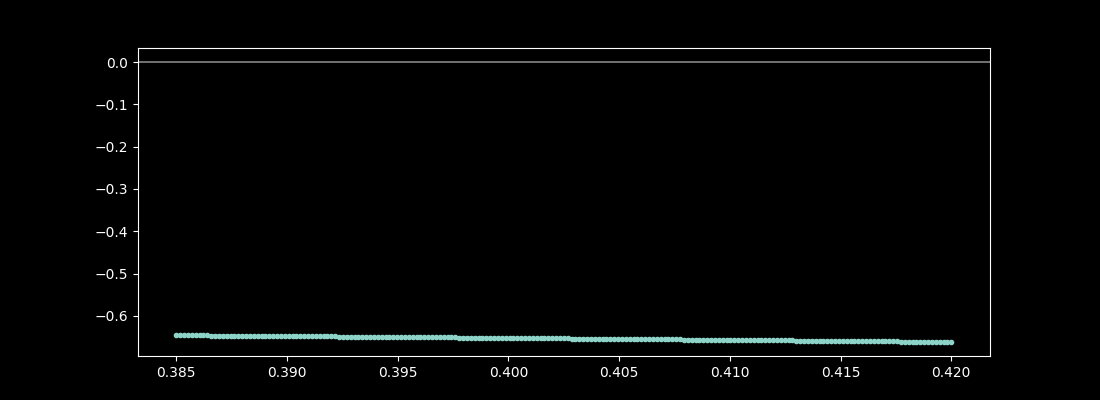

In [413]:
P_prop1_5.plot_transform()

#### Spike 2

In [414]:
# P_prop2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=.42, RZ=1.14, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop2 = Propagator_Class(A.real_contour(.42, 1.14, 200), f0=f0, Lx=-b, Rx=b)

In [415]:
# P_prop2_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.14, RZ=1.3, NZ=30, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop2_5 = Propagator_Class(A.real_contour(1.14, 1.3, 80), f0=f0, Lx=-b, Rx=b)

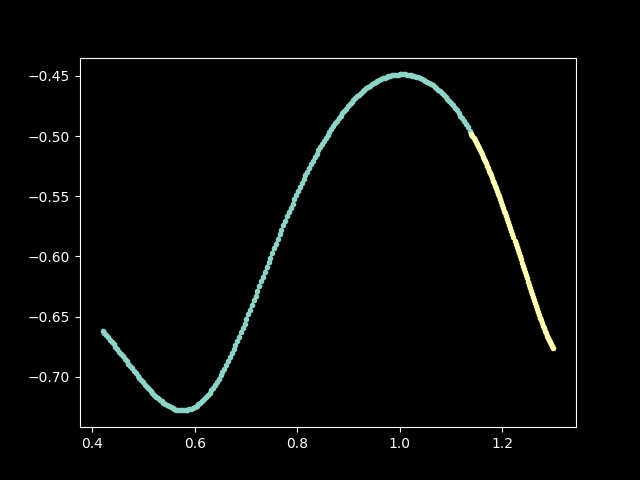

In [416]:
plt.close('all')
plt.plot(P_prop2.Zs, P_prop2.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop2_5.Zs, P_prop2_5.alphas.real, marker='o',markersize=3 );

#### Spike 3

In [417]:
# P_prop3 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.3, RZ=1.85, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop3 = Propagator_Class(A.real_contour(1.3, 1.85, 150), f0=f0, Lx=-b, Rx=b)

In [418]:
# P_prop3_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.85, RZ=2.05, NZ=20, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop3_5 = Propagator_Class(A.real_contour(1.85, 2.05, 100), f0=f0, Lx=-b, Rx=b)

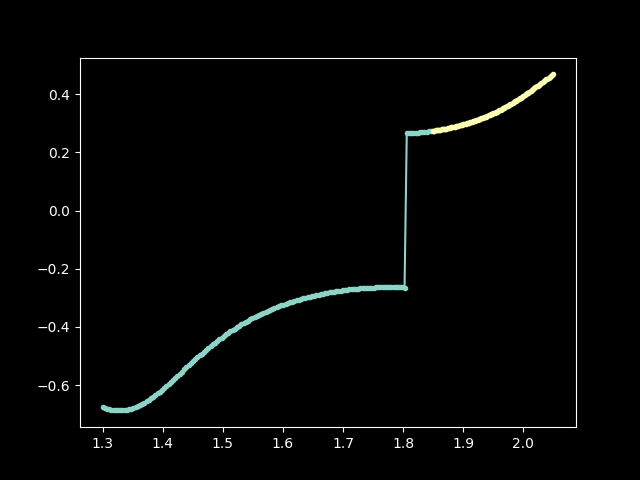

In [419]:
plt.close('all')
plt.plot(P_prop3.Zs, P_prop3.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop3_5.Zs, P_prop3_5.alphas.real, marker='o',markersize=3 );

#### Spike 4

In [420]:
# P_prop4 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.05, RZ=2.65, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop4 = Propagator_Class(A.real_contour(2.05, 2.65, 100), f0=f0, Lx=-b, Rx=b)

In [421]:
# P_prop4_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.65, RZ=2.8, NZ=20, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop4_5 = Propagator_Class(A.real_contour(2.65, 2.8, 80), f0=f0, Lx=-b, Rx=b)

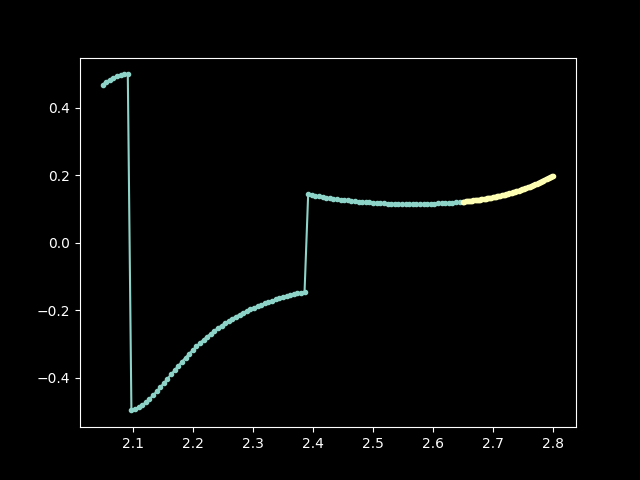

In [422]:
plt.close('all')
plt.plot(P_prop4.Zs, P_prop4.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop4_5.Zs, P_prop4_5.alphas.real, marker='o',markersize=3 );

#### Spike 5

In [423]:
# P_prop5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.8, RZ=3., NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop5 = Propagator_Class(A.real_contour(2.8, 3, 100), f0=f0, Lx=-b, Rx=b)

In [424]:
# P_prop5_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=3., RZ=3.52, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop5_5 = Propagator_Class(A.real_contour(3, 3.52, 120), f0=f0, Lx=-b, Rx=b)

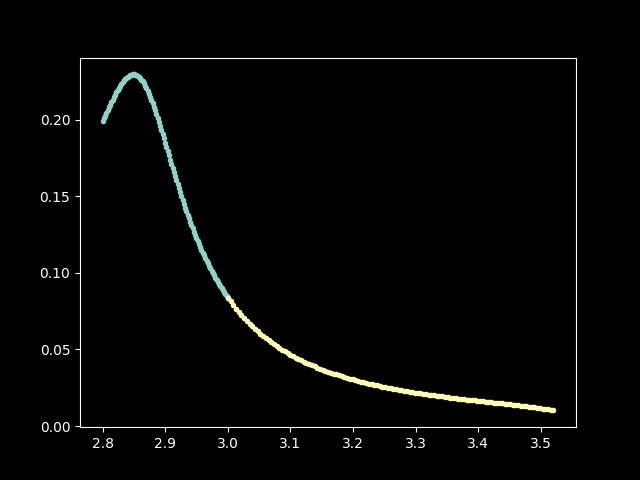

In [425]:
plt.close('all')
plt.plot(P_prop5.Zs, P_prop5.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop5_5.Zs, P_prop5_5.alphas.real, marker='o',markersize=3 );

#### Spike 6 and rest of propagating portion

In [426]:
# P_prop6 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=3.52, RZ=4.5, NZ=70, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop6 = Propagator_Class(A.real_contour(3.52, 4.5, 100), f0=f0, Lx=-b, Rx=b)

In [427]:
# P_prop7 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=4.5, RZ=A.Z_evanescent.real, NZ=120, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_prop7 = Propagator_Class(A.real_contour(4.5, A.Z_evanescent.real, 500), f0=f0, Lx=-b, Rx=b)

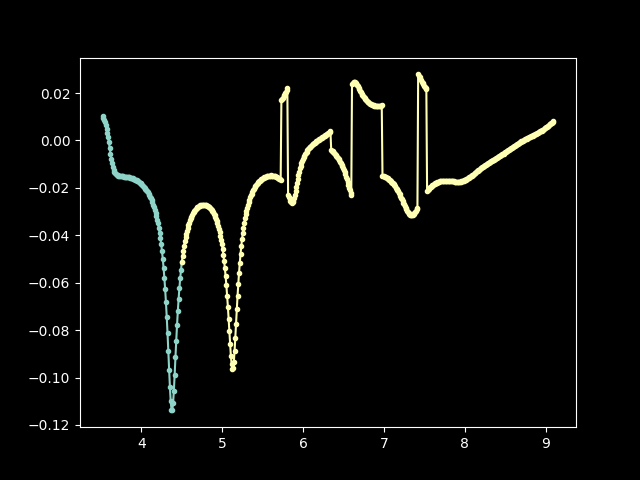

In [428]:
plt.close('all')
plt.plot(P_prop6.Zs, P_prop6.alphas.real, marker='o',markersize=3 );
plt.plot(P_prop7.Zs, P_prop7.alphas.real, marker='o',markersize=3 );

### Evanescent Portion

In [429]:
# P_ev = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=A.Z_evanescent.real, RZ=14, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_ev = Propagator_Class(A.real_contour(A.Z_evanescent.real, 14, 200), f0=f0, Lx=-b, Rx=b)

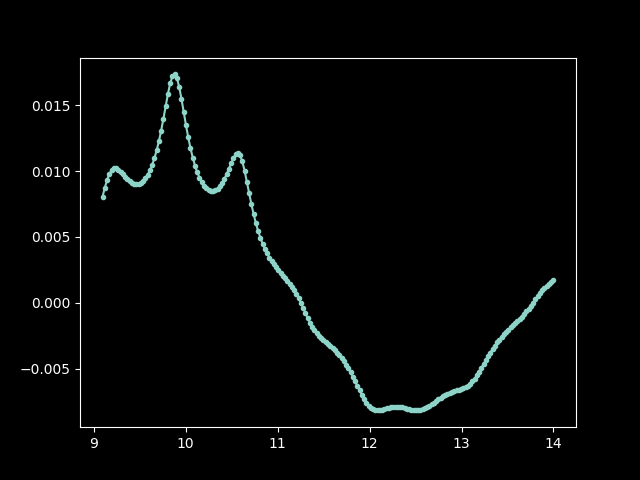

In [430]:
plt.close('all')
plt.plot(P_ev.Zs, P_ev.alphas.real,  marker='o',markersize=3 );

In [431]:
# P_ev2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=14, RZ=2*A.Z_evanescent.real, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P_ev2 = Propagator_Class(A.real_contour(14, 2*A.Z_evanescent.real, 200), f0=f0, Lx=-b, Rx=b)

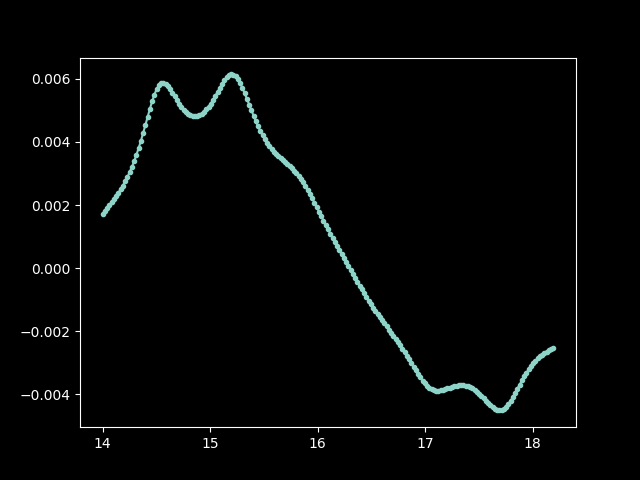

In [432]:
plt.close('all')
plt.plot(P_ev2.Zs, P_ev2.alphas.real, marker='o',markersize=3) ;

# Cross sections at input


In [433]:
propfuncs = [ P_prop1, 
             P_prop1_5, 
             P_prop2, 
             P_prop2_5, 
             P_prop3, 
             P_prop3_5, 
             P_prop4, 
             P_prop4_5, 
             P_prop5, 
             P_prop5_5, 
             P_prop6, 
             P_prop7,
            ]
evfuncs = [P_ev, 
           P_ev2]

In [434]:
prop = lambda x: sum([f.slice_propagate(x, method='left_endpoint') for f in propfuncs])
ev = lambda x: sum([f.slice_propagate(x) for f in evfuncs]) 
full = lambda x: prop(x) + ev(x)

In [435]:
F = A.fields_Z(1, mode_type='radiation')

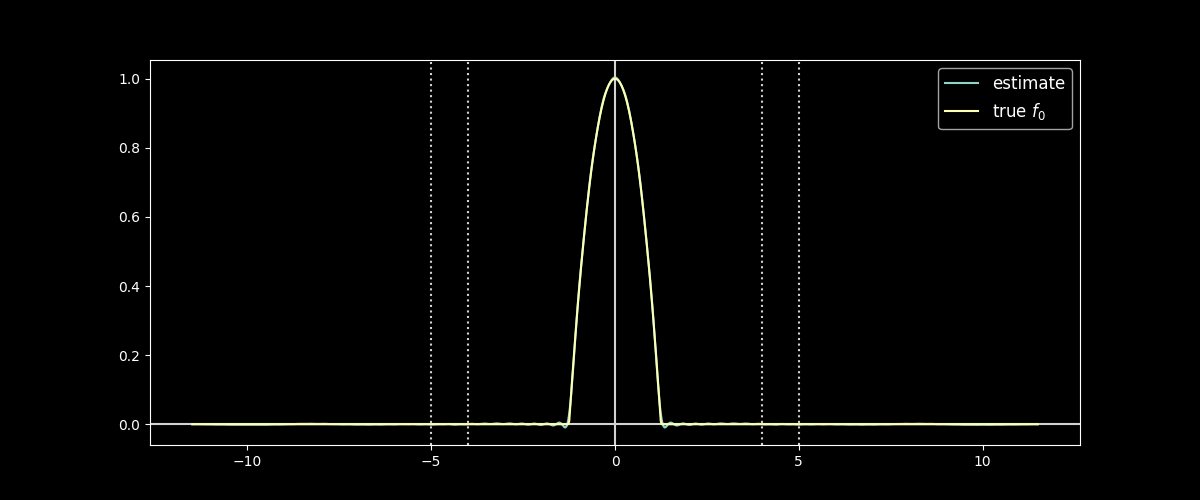

In [436]:
A.plot_field_1d(full, label='estimate') 
A.add_1d_plot(f0, label='true $f_0$')
# plt.gca().set_xlim(-3,3)

# 2D Filled Contour Plots

In [437]:
Prop = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])
Ev = lambda x, z: sum([f.propagate(x, zs=z) for f in evfuncs]) 
Full = lambda x, z: Prop(x, z) + Ev(x, z)

In [438]:
# Setting Xs, useful to differentiate resolution between regions
B= SlabExact(scale=1e-5, Ts=[10, 1, 8, 1, 10],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[30, 8, 40, 8, 30],
              symmetric=True, wl=max_loss_wl)

In [439]:
xs = B.all_Xs

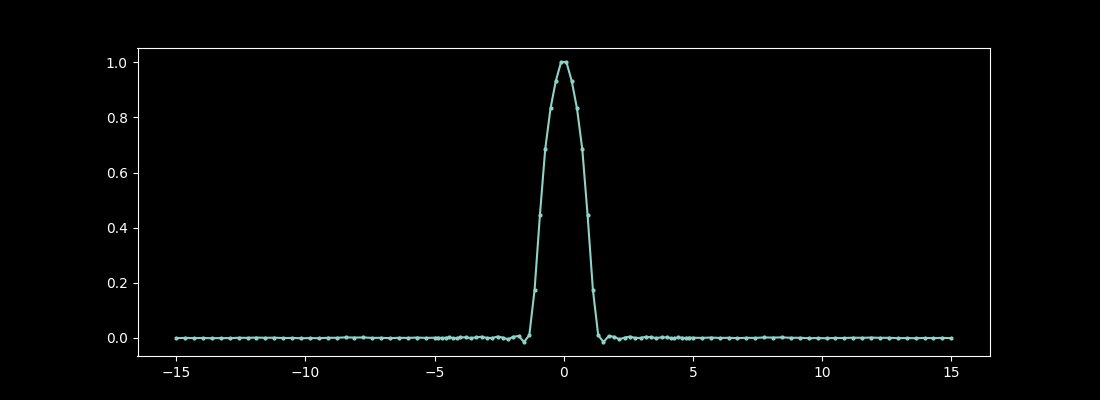

In [440]:
plt.close('all')
fig = plt.figure(1, figsize=(11,4))
plt.plot(xs, prop(xs).real, marker='o', markersize=2);

In [441]:
# Good ratio for z is 40 points per 2 units (so 20 points per unit)
# zmin, zmax=0, 60
# A.plot_field_2d(Full, xs=xs, zmin=zmin,
#                 # colorbar=False,
#                 zmax=zmax, zref=int((zmax-zmin)*20),
#                 equal=True,
#                );

# Surface Plot

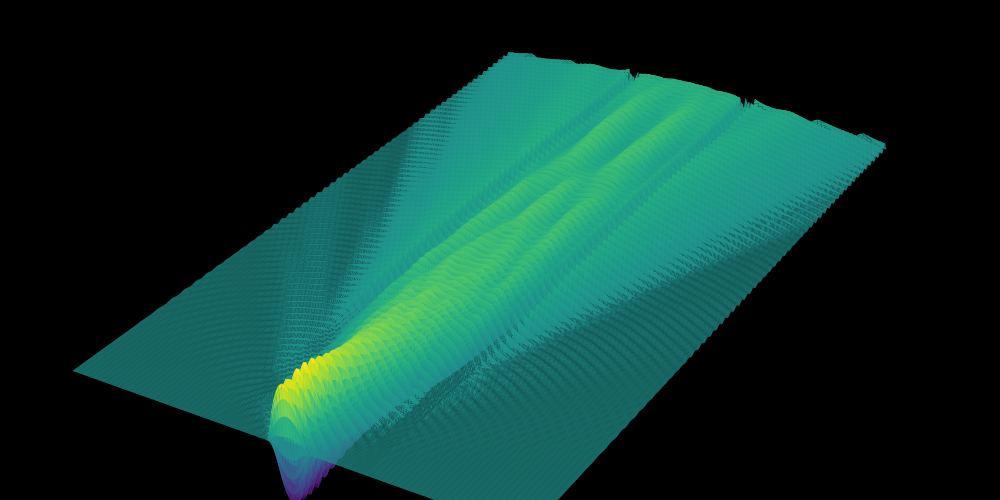

In [442]:
zmin, zmax=0, 50
A.plot_field_2d_surface(Full, xs=xs, colorbar=False, zoom=3,
                azim=-60, elev=30, zmin=0,
                zmax=zmax, zref=int(zmax*25),
                rstride=1, cstride=1,
               );

# Leaky mode representation via contour integration


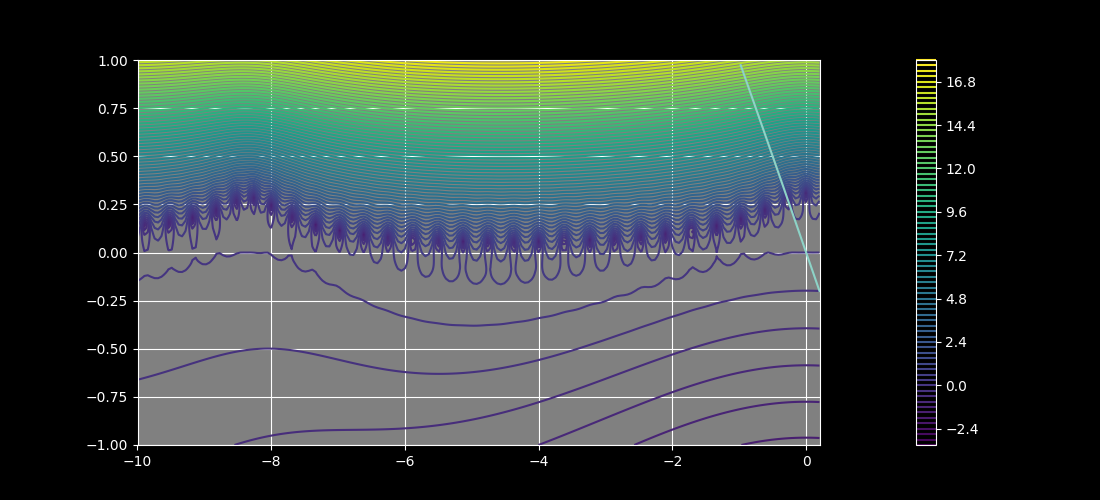

In [443]:
A.deteriminant_plot(-10, .2, -1, 1, rref=200, iref=200, levels=80)

In [444]:
z_guesses = np.array([
    -.65 + .2j, 
    -1.3 + .13j,
    -2.1 + .1j, 
    -2.9 + .85j, 
    -3.6 + .7j,
    -4.4 + .7j,
    -5.17 + .06j,
    -5.85 + .07j,
    -6.7 + .09j,
    -7.35 + .14j,
    -8. + .2j, 
    -8.5 + .28j, 
    -9.2 + .18j,
])

Zs = []
for z in z_guesses:
    Zs.append(newton(A.determinant_Z, z, args=(field_type, 'leaky')))
Zs = np.array(Zs)

for Z in Zs:
    plt.plot(Z.real, Z.imag, marker='o')

In [445]:
# A.plot_field_1d(lambda x: -A.fields_Z(Zs[0], mode_type='leaky', rounding=10)(x));

## Construct field

In [446]:
P_leaky = []

for Z in Zs:
    PZe = Propagator_Class(A.circular_contour(Z, 1e-6, 5), f0=f0, Lx=-b, Rx=b,)
    P_leaky.append(PZe)

In [447]:
full_leaky = lambda x : sum([P.slice_propagate(x) for P in P_leaky])
Full_leaky = lambda x, z : sum([P.propagate(x, zs=z) for P in P_leaky])
diff = lambda x: full_leaky(x) - full(x)
Diff = lambda x,z : Full_leaky(x,z) - Full(x,z)

## Leaky field profile at input

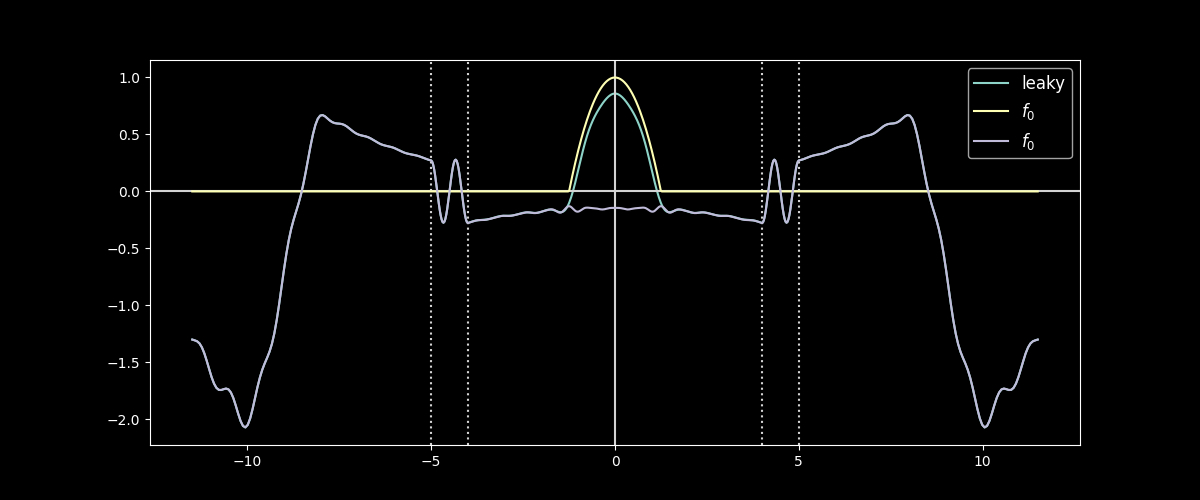

In [448]:
A.plot_field_1d(full_leaky, label='leaky')
A.add_1d_plot(f0, label='$f_0$')
A.add_1d_plot(diff, label='$f_0$')

## 2D overhead plot of leaky mode field approximation

In [449]:
# Setting Xs, useful to differentiate resolution between regions
C = SlabExact(scale=1e-5, Ts=[2, 1, 8, 1, 2],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[10, 8, 60, 8, 10],
              symmetric=True, wl=max_loss_wl)

In [450]:
xs = C.all_Xs

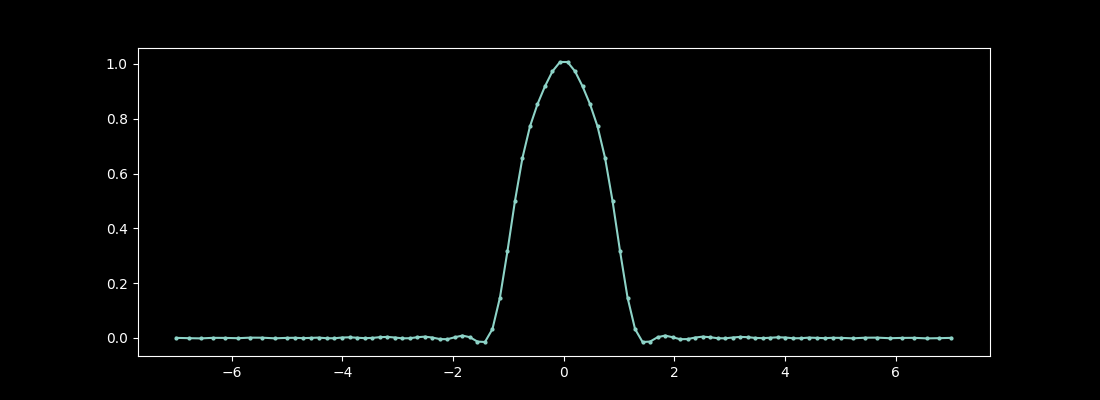

In [451]:
plt.close('all')
fig = plt.figure(1, figsize=(11,4))
plt.plot(xs, prop(xs).real, marker='o', markersize=2);

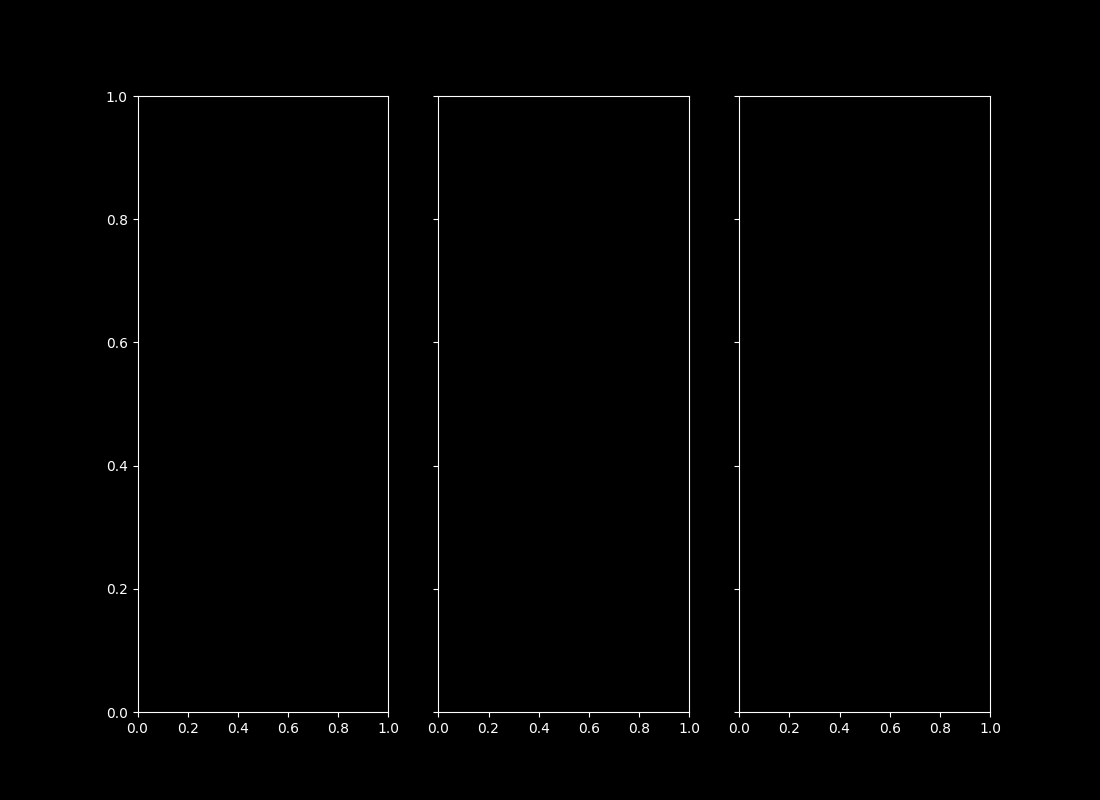

In [65]:
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,8))

xs = C.all_Xs

zmin = 0
zmax = 60
zref = int((zmax-zmin)*40/2)
zs = np.linspace(zmin, zmax, zref)


In [66]:
A.add_2d_plot(Full, ax=ax1, xs=xs, zs=zs, plot_Rhos=True, colorbar=True,);
ax1.set_title('True Field')

Text(0.5, 1.0, 'True Field')

In [67]:
A.add_2d_plot(Full_leaky, ax=ax2, xs=xs, zs=zs, plot_Rhos=True, colorbar=True);
ax2.set_title('Leaky Mode Field')

Text(0.5, 1.0, 'Leaky Mode Field')

In [68]:
A.add_2d_plot(Diff, ax=ax3, xs=xs, zs=zs, part='norm', plot_Rhos=True, colorbar=True);
ax3.set_title('Norm of Difference')

Text(0.5, 1.0, 'Norm of Difference')

## Asymptotics (slice along z-axis at x=0)

In [452]:
x0 = 0

full_z_leaky = lambda z: sum([P.slice_propagate(z, x0, 'x') for P in P_leaky])
full_z = lambda z: sum([f.slice_propagate(z, x0, 'x') for f in propfuncs]) + sum([f.slice_propagate(z, x0, 'x') for f in evfuncs]) 

ratio = lambda z: full_z_leaky(z) / full_z(z)


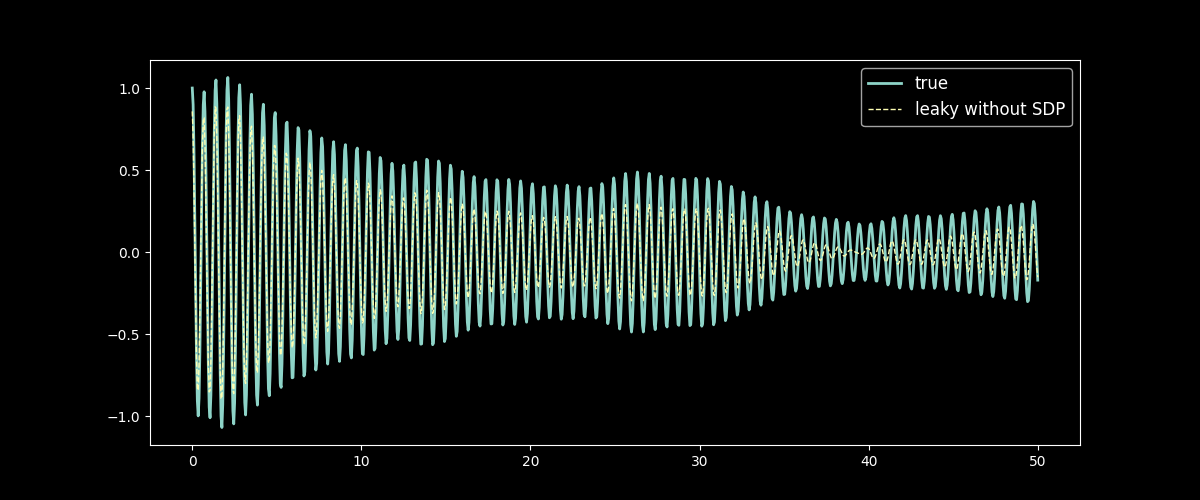

In [453]:
part = 'real'
zmin, zmax = 0, 50
zref=int((zmax-zmin)*20)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_axis=False, plot_Rhos=False, linewidth=2, label='true');
A.add_1d_plot(full_z_leaky_ours, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky without SDP');
# A.add_1d_plot(ratio, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');


# Integral along Steepest Descent Path in Z plane

Here we examine the remaining portion of the expansion, namely the integral along the steepest descent path (SDP).

The SDP is found by keeping the imaginary part of $\beta(Z) = i \sqrt{k_0^2n_0^2 - Z^2}$ constant at $\text{Im}(\beta(0)) = k_0 n_0$.  Using $Z = x + y i$ we calculate from the complex square root formula that 

$$ y = \pm \frac{k_0 n_0 x}{\sqrt{k_0^2n_0^2 + x^2}}$$

along this path. Below we plot this over the determinant function.

In [454]:
def sdp(x, guide=A):
    K = guide.K0 * guide.n0
    return -(K * x) / np.sqrt(K**2 + x**2)

In [455]:
xmin, xmax= -5, .5
ymin, ymax = -1, 2
xs_sdp = np.linspace(xmin, xmax, 1000)
ys_sdp = sdp(xs_sdp)
msk = np.where((ys_sdp<ymax)*(ys_sdp>ymin))

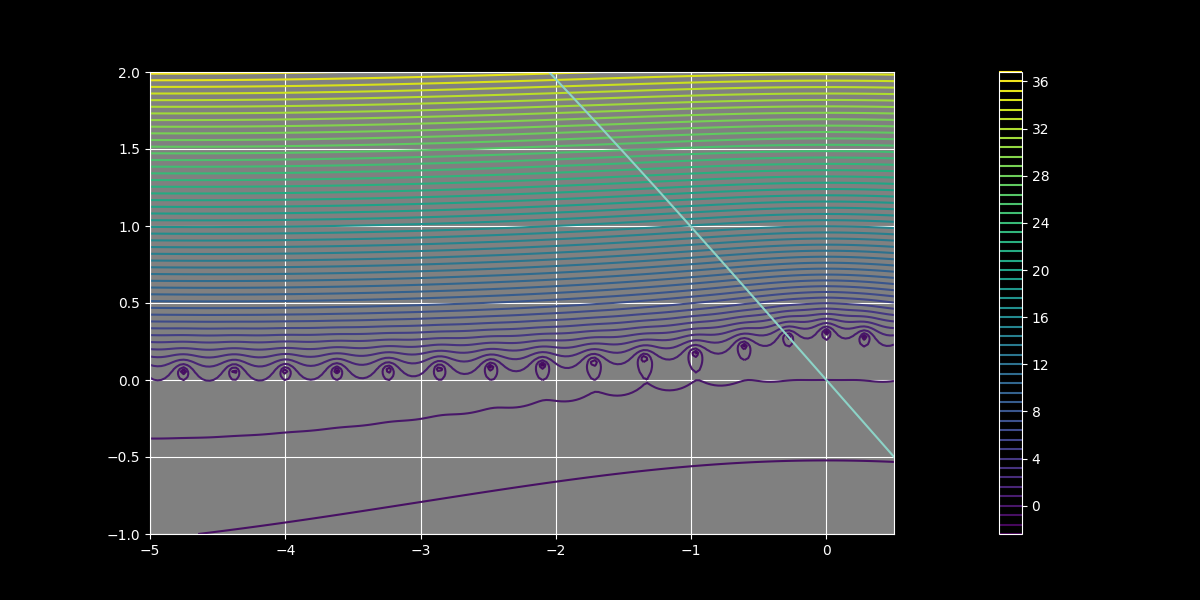

In [456]:
plotlogf(A.determinant_Z, xmin, xmax, ymin, ymax, 'TE', 'leaky', iref=200, rref=200, levels=50)
ax = plt.gca()
ax.plot(xs_sdp[msk], ys_sdp[msk]);
# ax.plot(xs[msk], -ys[msk]);

To integrate along this path, we need it's complex derivative.  Using the parameterization

$$Z(x) = x + i y(x) = x \pm i \frac{k_0 n_0 x}{\sqrt{k_0^2n_0^2 + x^2}},$$

from above, we see that the derivative is

$$ \frac{dZ}{dx} = 1 \pm i \left( \frac{k_0 n_0}{\sqrt{k_0^2n_0^2 + x^2}}\right)^3$$

## Propagate along SDP

We're building in the capabilities to do this

In [457]:
Propagator_Class = A.propagator()

In [458]:
# P_sdp1 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-.01, RZ=-.7, NZ=60, 
#                      field_type=field_type, paper_method=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
# P_sdp2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-.7, RZ=-2.5, NZ=60, 
#                      field_type=field_type, paper_method=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)

P_sdp1 = Propagator_Class(A.sdp_contour(-.0001, -.7, 100), f0=f0, Lx=-b, Rx=b)
P_sdp2 = Propagator_Class(A.sdp_contour(-.7, -2.5, 160), f0=f0, Lx=-b, Rx=b)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

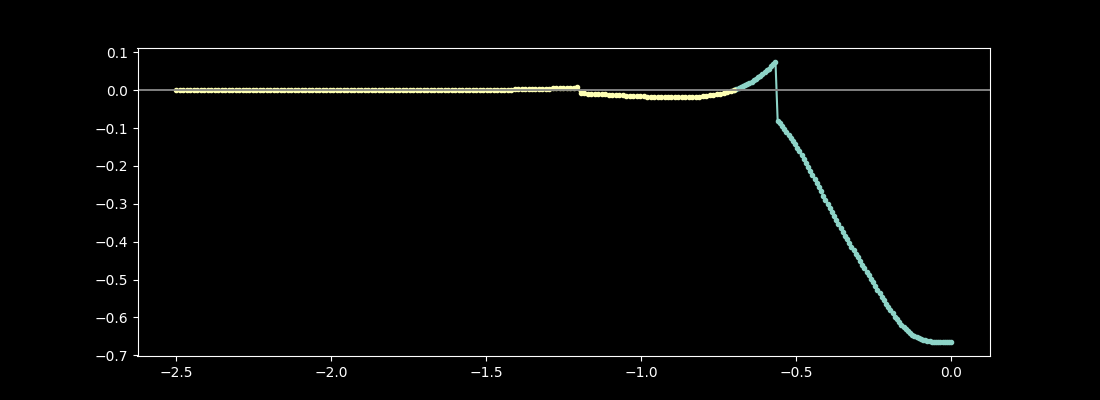

In [459]:
P_sdp1.plot_transform()
P_sdp2.plot_transform(ax=plt.gca())

In [460]:
x_slice = 0

sdp = lambda x: -(P_sdp1.slice_propagate(x,0) + P_sdp2.slice_propagate(x,0))
sdp_z = lambda z: -(P_sdp1.slice_propagate(z, x_slice, 'x') + P_sdp2.slice_propagate(z, x_slice, 'x'))

Sdp = lambda x, z: -(P_sdp1.propagate(x, z) + P_sdp2.propagate(x, z))

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

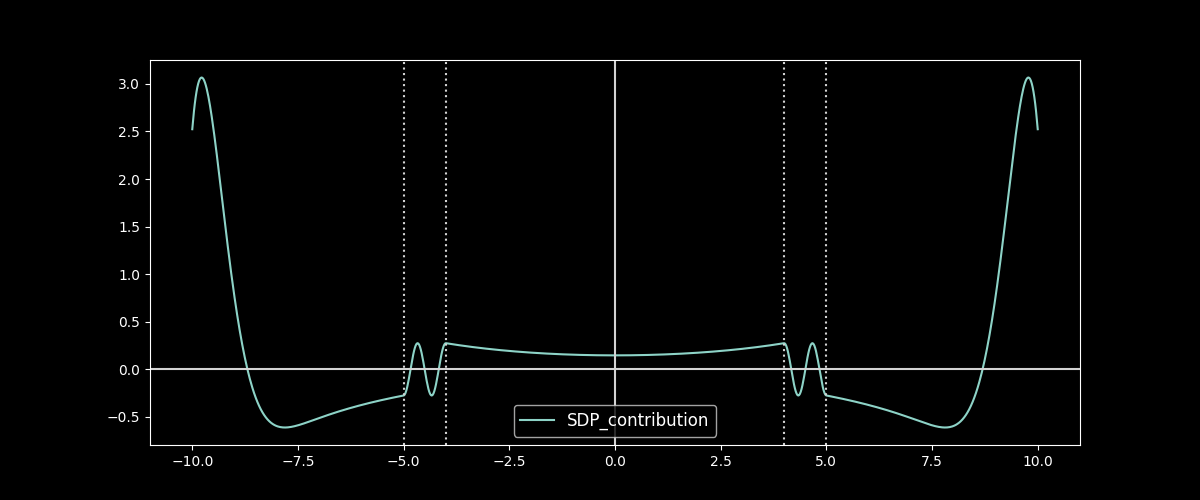

In [461]:
A.plot_field_1d(sdp, xs=np.linspace(-10,10,1000), part='real', label='SDP_contribution')

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

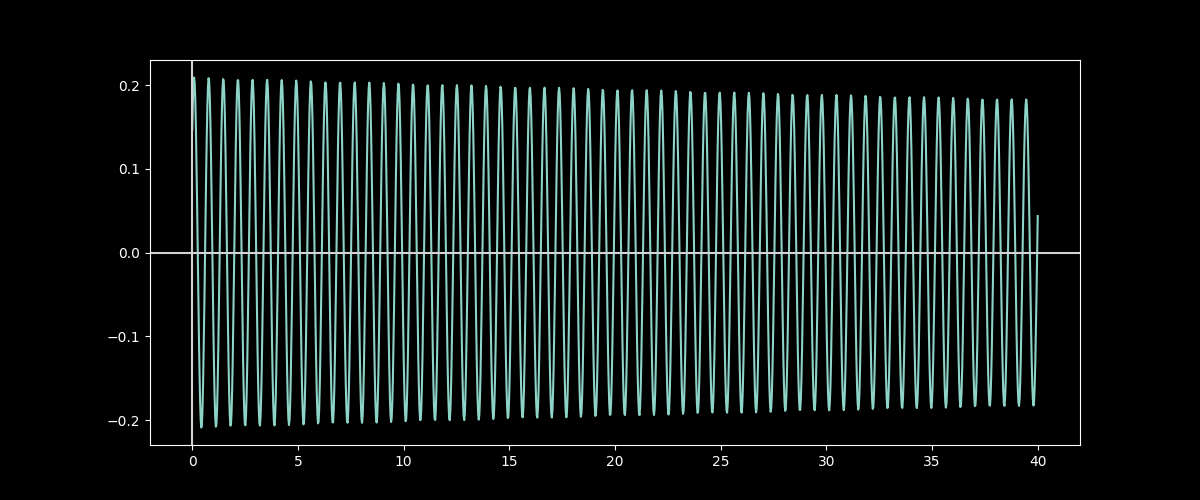

In [462]:
A.plot_field_1d(sdp_z, xs=np.linspace(0,40,1400), plot_Rhos=False)

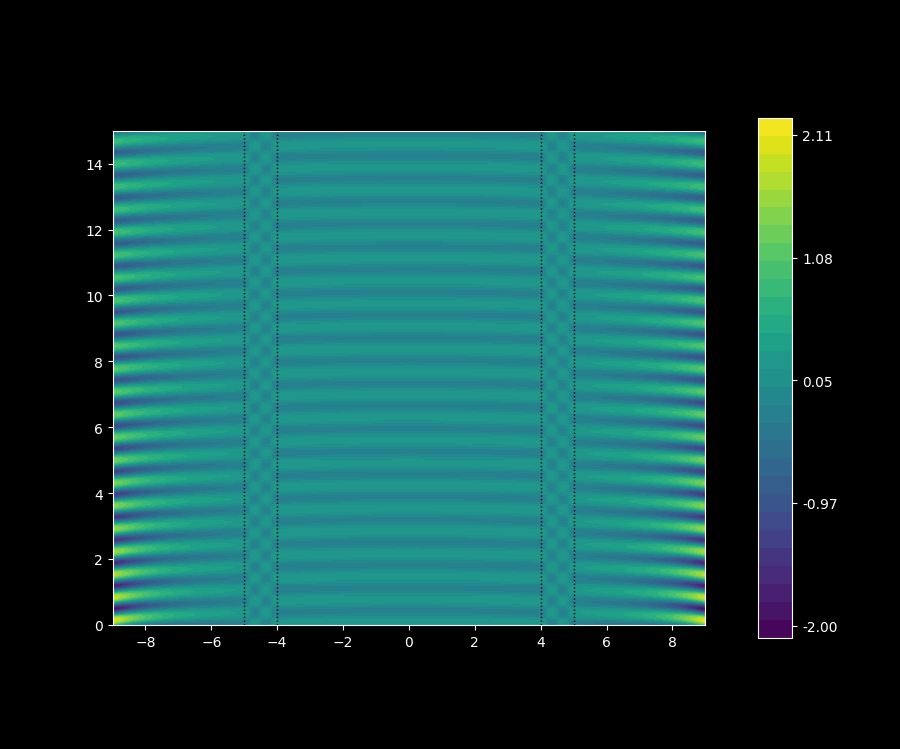

In [463]:
A.plot_field_2d(Sdp, xs=np.linspace(-9,9,1000), zmax=15, zref=15*30);

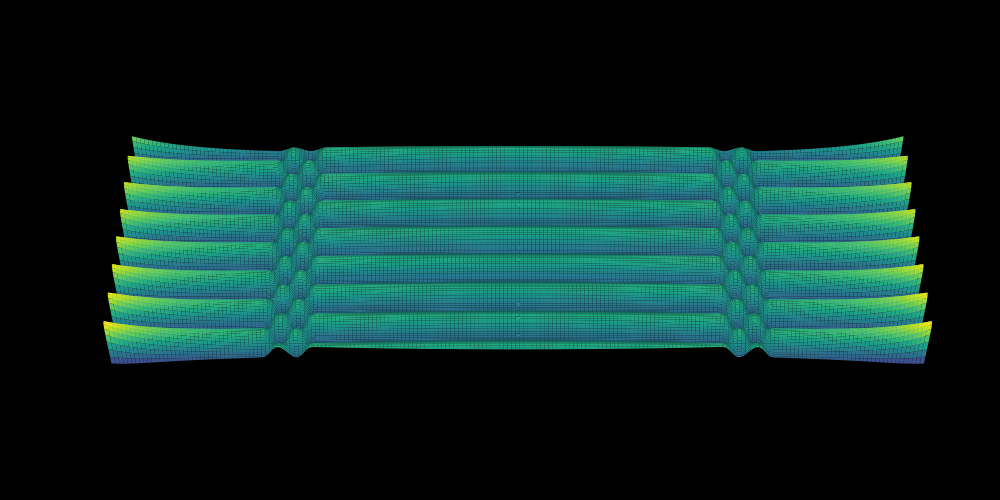

In [464]:
A.plot_field_2d_surface(Sdp, xs=np.linspace(-8, 8, 200), zmax=5, zref=150, cstride=1, rstride=1,
                       colorbar=False);

## Combined Leaky and SDP field profile at input

In [465]:
full_leaky_w_sdp = lambda x : full_leaky(x) + sdp(x)
Full_leaky_w_sdp = lambda x, z : Full_leaky(x,z) + Sdp(x,z)
diff_w_sdp = lambda x: full_leaky_w_sdp(x) - full(x)
Diff_w_sdp = lambda x,z : Full_leaky_w_sdp(x,z) - Full(x,z)

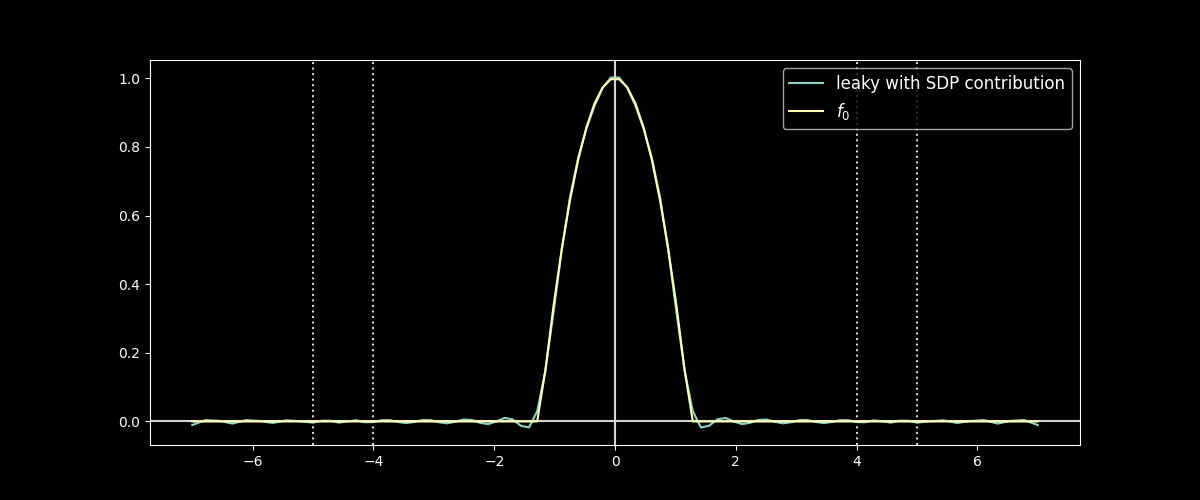

In [466]:
A.plot_field_1d(full_leaky_w_sdp, xs=xs,label='leaky with SDP contribution')
A.add_1d_plot(f0, xs=xs, label='$f_0$')

## Comparison of Combined Leaky and SDP Fields with True Field

In [467]:
# Setting Xs, useful to differentiate resolution between regions
C = SlabExact(scale=1e-5, Ts=[2, 1, 8, 1, 2],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[10, 8, 60, 8, 10],
              symmetric=True, wl=max_loss_wl)

In [468]:
# xs = C.all_Xs
# plt.close('all')
# fig = plt.figure(1, figsize=(11,4))
# plt.plot(xs, prop(xs).real, marker='o', markersize=2);

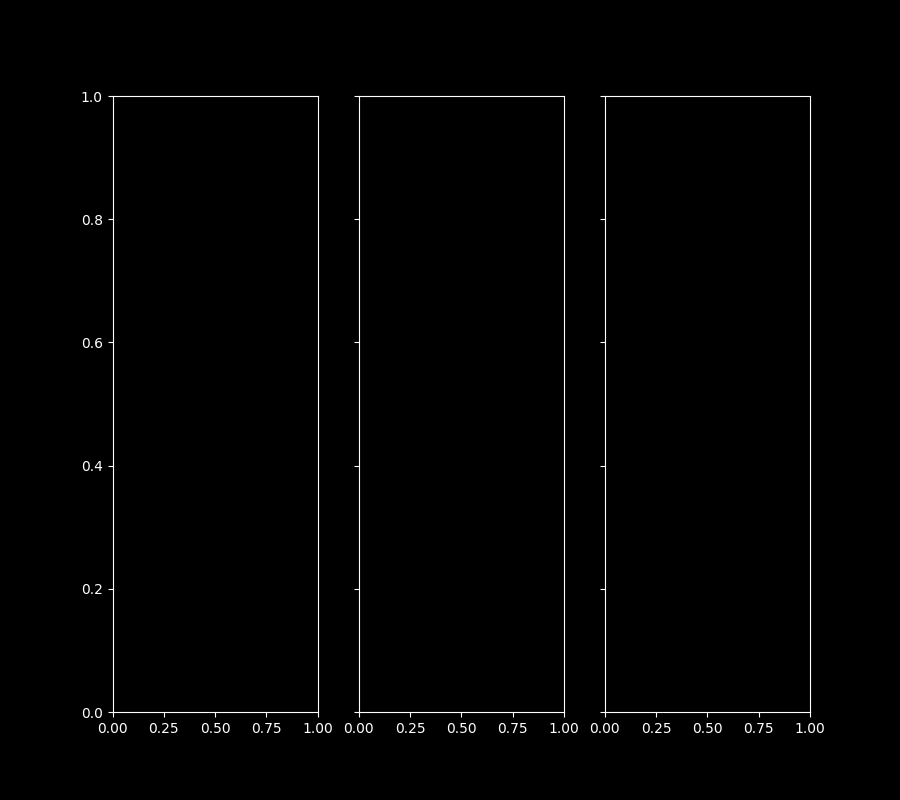

In [469]:
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9,8))

xs = C.all_Xs

zmin = 0
zmax = 60
zref = int((zmax-zmin)*40/2)
zs = np.linspace(zmin, zmax, zref)

In [470]:
A.add_2d_plot(Full, ax=ax1, xs=xs, zs=zs, plot_Rhos=True, colorbar=True, shrink=.9);
ax1.set_title('True Field')

Text(0.5, 1.0, 'True Field')

In [471]:
A.add_2d_plot(Full_leaky_w_sdp, ax=ax2, xs=xs, zs=zs, plot_Rhos=True, colorbar=True, shrink=.9);
ax2.set_title('Leaky Mode Field with SDP')

Text(0.5, 1.0, 'Leaky Mode Field with SDP')

In [472]:
A.add_2d_plot(Diff_w_sdp, ax=ax3, xs=xs, zs=zs, part='norm', plot_Rhos=True, colorbar_format='%.1e', shrink=.9, colorbar_nticks=4,  colorbar=True);
ax3.set_title('Norm of Difference')

Text(0.5, 1.0, 'Norm of Difference')

## Asymptotics (slice along z-axis at x=0)

In [473]:
slice_at_x = 0
constant_variable = 'x'

full_z_leaky_w_sdp = lambda z: full_z_leaky(z) + sdp_z(z)
full_z = lambda z: sum([f.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for f in propfuncs]) 

diff_w_sdp_z = lambda z: full_z_leaky_w_sdp(z) - full_z(z)
ratio = lambda z: full_z_leaky_w_sdp(z) / full_z(z)


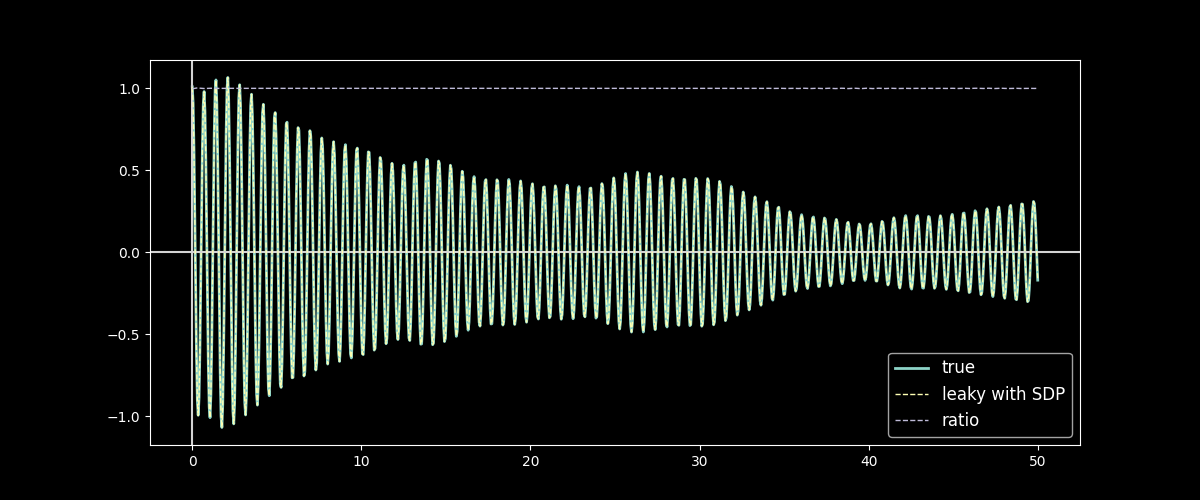

In [474]:
part = 'real'
zmin, zmax = 0, 50
zref=int((zmax-zmin)*20)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=2, label='true');
A.add_1d_plot(full_z_leaky_w_sdp, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky with SDP');
A.add_1d_plot(ratio, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');


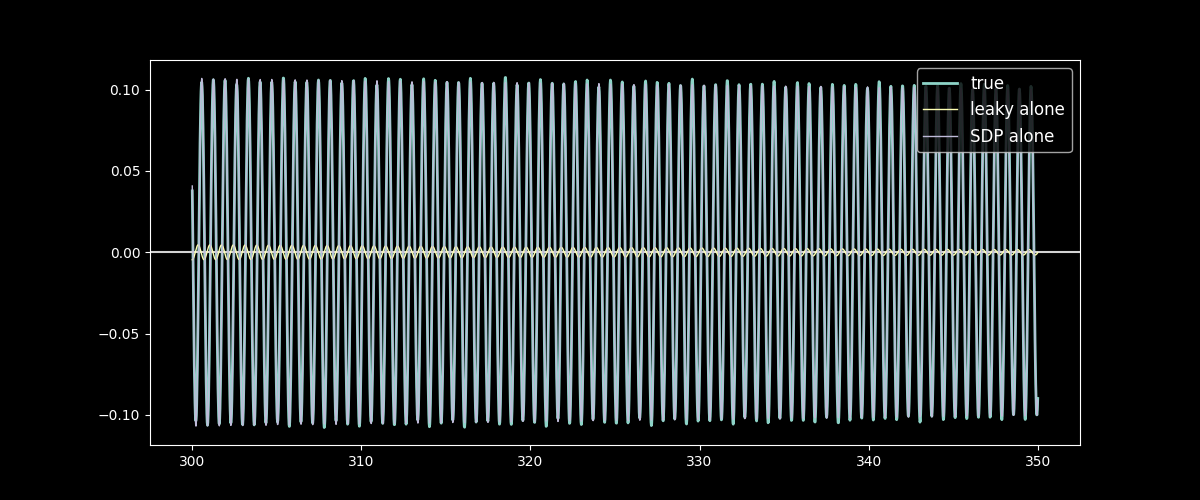

In [475]:
part = 'real'
zmin, zmax = 300, 350
zref=int((zmax-zmin)*50)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=2, label='true');
A.add_1d_plot(full_z_leaky, xs=zs, part=part, linewidth=1, linestyle='-', label='leaky alone');
A.add_1d_plot(sdp_z, xs=zs, part=part, linewidth=1, linestyle='-', label='SDP alone');

## Comparison of Closed Form Asymptotic Approximation to SDP Integral with True SDP field

In [18]:
SpaceWave = A.space_wave_approx(f0, Z0=1e-9, dZ=1e-11, Lx=-b, Rx=b)

In [37]:
z0 = np.array([100])
x0 = 0

space_wave_x = lambda x, z0=z0: SpaceWave(x, z0)
space_wave_z = lambda z, x0=x0: SpaceWave(x0, z)

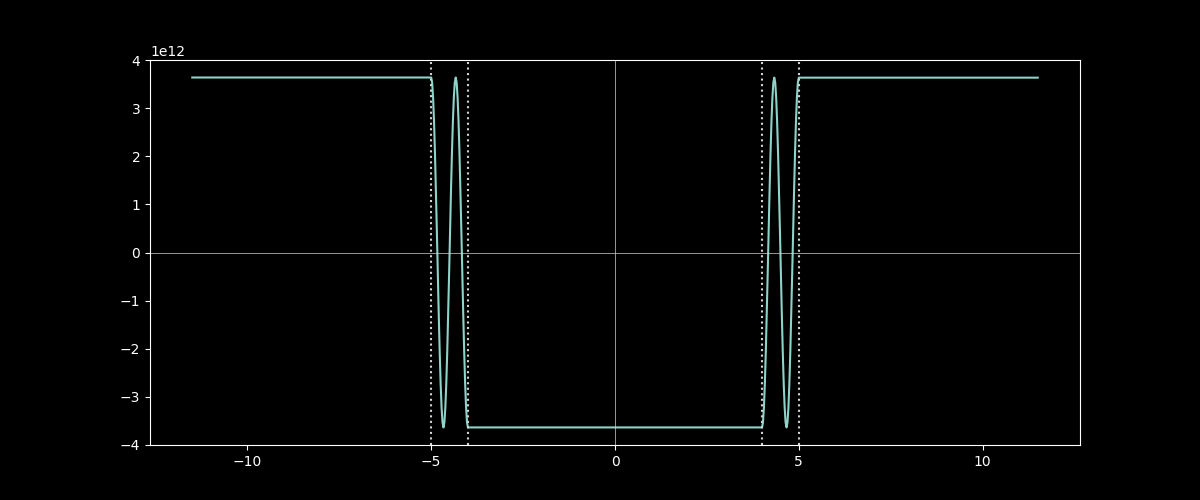

In [38]:
A.plot_field_1d(space_wave_x);

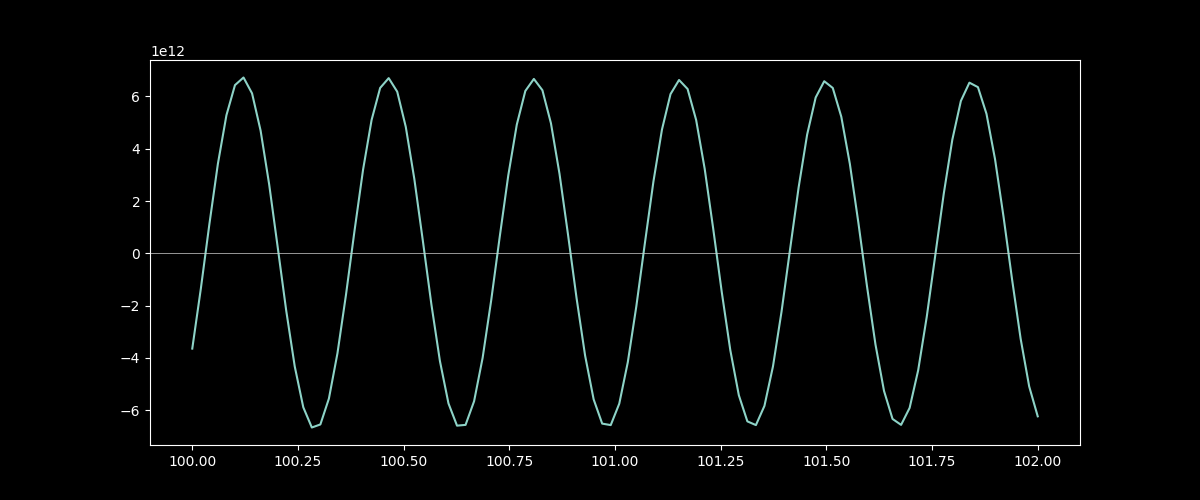

In [40]:
z0 = 1e2
dz = 2
zref=int(dz*50)
zs = np.linspace(z0, z0+dz, zref)

A.plot_field_1d(space_wave_z, xs=zs, plot_Rhos=False);
A.add_1d_plot(sdp_z, xs=zs, part=part, linewidth=1, linestyle='-', label='SDP alone');

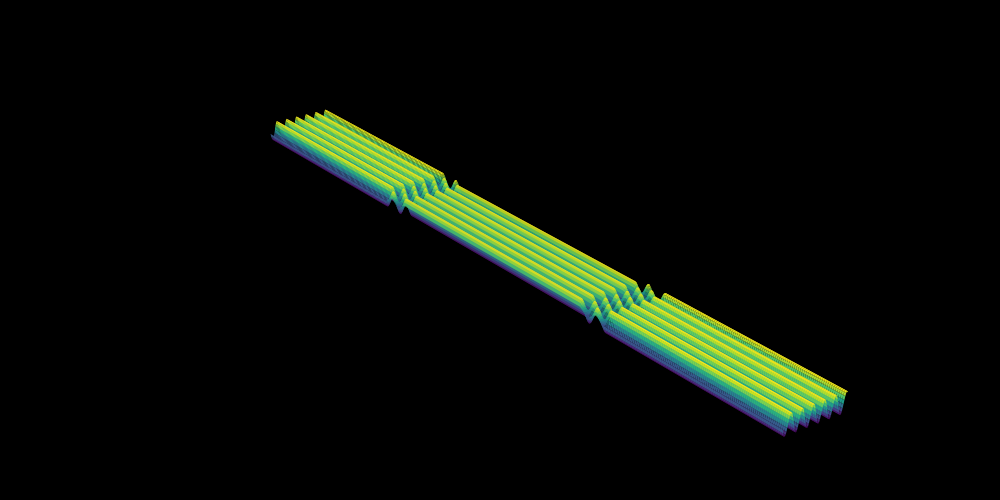

In [41]:
A.plot_field_2d_surface(SpaceWave, zmin=500, zmax=502, zref=100, rstride=1, cstride=1, elev=24, azim=-36);

## Observations

- Location of leaky modes is very different.  First leaky mode no longer plays a role in expansion as it is not between real axis and SDP.  Nearby leaky modes are very lossy, only after some decrease in the real part of Z do they become confined enough to likely play a part in long term asymptotic behavior of the fields in z direction.

- Although the above is true in terms of the locations of the leaky mode propagation constants, the role in confinement loss is more complex. The initial magnitude of the lossier leaky modes is much greater than that of the more confined leaky modes, so may be the case that this negates above hypothesis, or that it balances out somehow.

- Space wave much larger in heterogeneous regions in resonant case.

- The space wave is therefore no longer negligible.

- Near to the input end, space wave is needed to give correct matching to input field near field propagation.

- For long term asymptotics it predominates by far.  It's decay should be the one to determine the confinement loss in the resonant case.

- However, it's decay rate may be the same as for the combined leaky mode field.  Need to see if this is the case and also check what leaky mode predominates at point that the observation holds.

# Save data for visualization


In [504]:
xs = A.all_Xs
zs = np.linspace(0, 100, int(100*40/2))

In [505]:
f0s = f0(xs)

In [506]:
rad_ys_propagating = Prop(xs, zs)


In [507]:
rad_ys_evanescent = Ev(xs, zs)


In [508]:
# guided_ys = alpha * Fs1(xs, zs=zs)

In [509]:
Xs, Zs = np.meshgrid(xs, zs)

In [510]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


In [511]:
prefix='/home/pv/local/slab/apps/resonant/'

In [512]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)

In [513]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)

In [514]:
# save_heights_as_json(prefix + 'guided_heights', guided_ys, Xs)

In [515]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)

In [516]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)

In [517]:
save_values_as_json(prefix + 'f0s', f0s)

In [518]:
save_values_as_json(prefix + 'x0s', xs)

# Previous leaky mode work

In [18]:
mode_type = 'leaky'
k_low = A.K_low

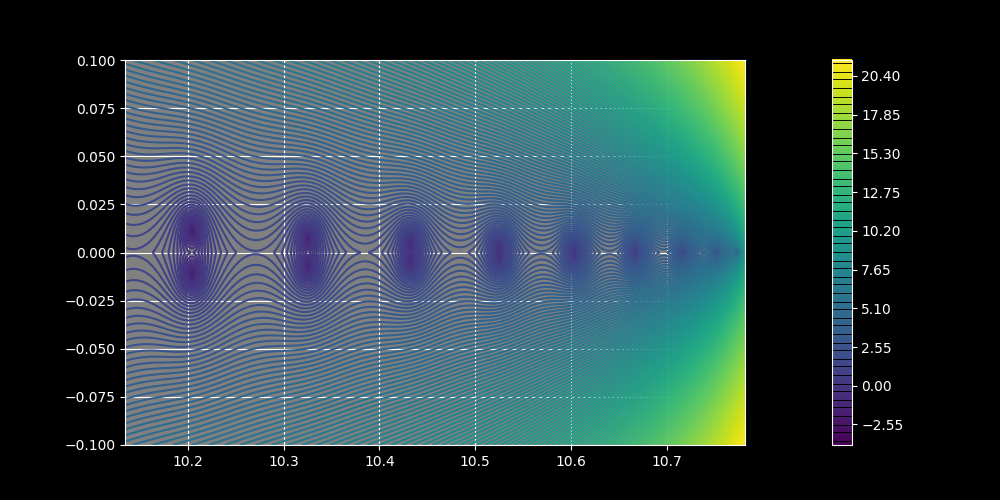

In [19]:
plotlogf(A.determinant, .94*A.K_low, 1.0001*A.K_low, -.1, .1, field_type, mode_type, 
         figsize=(10,5),iref=400, rref=400, levels=200)

### Only even modes necessary

In [20]:
beta1 = newton(A.determinant, 10.775, args=(field_type, mode_type)).conj()
beta2 = newton(A.determinant, 10.715, args=(field_type, mode_type))
beta3 = newton(A.determinant, 10.6, args=(field_type, mode_type))
beta4 = newton(A.determinant, 10.42, args=(field_type, mode_type))
beta5 = newton(A.determinant, 10.2, args=(field_type, mode_type))

betas = [beta1, beta2, beta3, beta4, beta5]
for beta in betas:
    plt.plot(beta.real, beta.imag, marker='o')


In [21]:
Fs1 = A.fields(beta1, field_type=field_type, mode_type=mode_type, c0=-1)
Fs2 = A.fields(beta2, field_type=field_type, mode_type=mode_type, c0=-1)
Fs3 = A.fields(beta3, field_type=field_type, mode_type=mode_type, c0=-1)
Fs4 = A.fields(beta4, field_type=field_type, mode_type=mode_type, c0=-1)
Fs5 = A.fields(beta5, field_type=field_type, mode_type=mode_type, c0=-1)

Fs = [Fs1, Fs2, Fs3, Fs4, Fs5]

leaky
leaky
leaky
leaky
leaky


/home/pv/local/slab/slab.py:535: UserWarning: Provided mode type leaky, but coefficients in outer region do not align with this. User may wish to check supplied propagation constant and/or rounding parameter.
  warn(message='Provided mode type %s, but coefficients in outer \


### Plotting leaky modes

#### 1D plots

/home/pv/local/slab/slab.py:1525: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)
/home/pv/local/slab/slab.py:1589: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


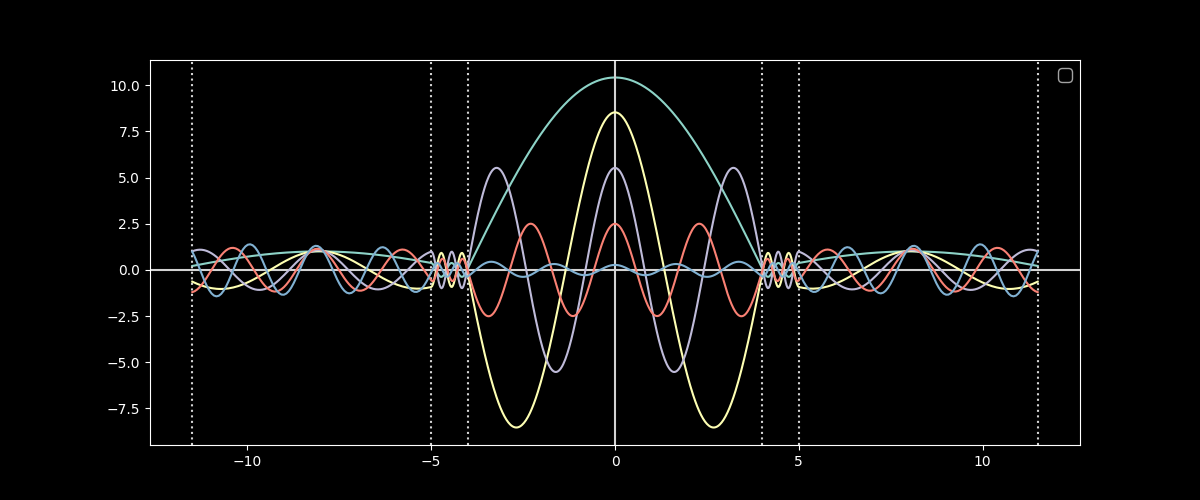

In [22]:
A.plot_field_1d(Fs1)
A.add_1d_plot(Fs2)
A.add_1d_plot(Fs3)
A.add_1d_plot(Fs4)
A.add_1d_plot(Fs5)


### Build "full" leaky field

At this point this is just to get an idea of combining leaky modes.  Scaling should be done via contour integration.

In [23]:
from scipy.integrate import quad
cfs = np.zeros(len(Fs))
alphas = np.zeros(len(Fs))
for i,F in enumerate(Fs):
    integrand = lambda x: F(x) * F(x).conjugate()
    cfs[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real
    integrand = lambda x: f0(x) * F(x).conjugate()
    alphas[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real

# Note: Not clear that this is correct process for scaling leaky fields

In [24]:
Full_leaky = lambda x, z: sum([Fs[i](x,z) * alphas[i]/cfs[i] for i in range(len(Fs))])

### 2D plots

In [25]:
xs = np.linspace(-20,20,1000)

(-20.0, 20.0, 0.0, 100.0)

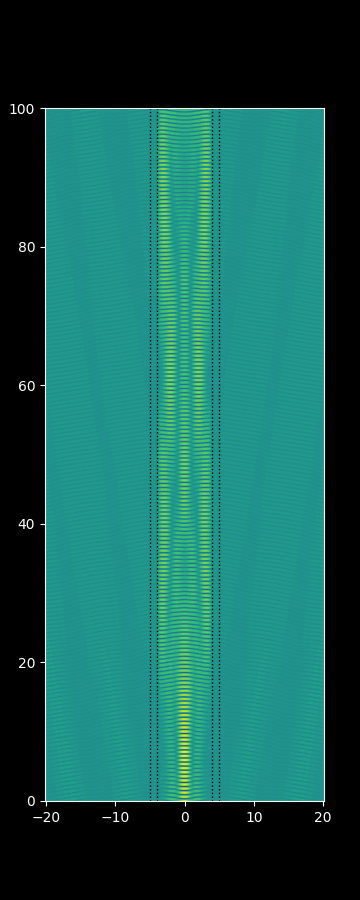

In [26]:
fig, ax = A.plot_field_2d(Full_leaky, xs=xs, zmin=0, zmax=100, zref=2000, colorbar=False)
plt.axis('equal')